In [1]:
import mne
import pandas as pd
import re #regex library to format fast to read into pd 
import os

import matplotlib.pyplot as plt
import feather

import numpy as np
import platform
import mne
from scipy.stats import ttest_ind

from scipy import stats

from mne.channels import find_ch_adjacency, make_1020_channel_selections
from mne.stats import spatio_temporal_cluster_test
from mne.stats import (ttest_1samp_no_p, bonferroni_correction, fdr_correction,


                       permutation_t_test, permutation_cluster_1samp_test,spatio_temporal_cluster_1samp_test)
import sys
if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell. 
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

from base.files_in_out import getListOfFiles,GetFiles
from stats.stats_helper import filter_list, tTest_ana, filter_list_equal
import stats.t_tests_cluster as clus
import stats.stats_helper as s_hp
import base.base_constants as cs

/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/datasets/eegbci/eegbci.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
g_num='g01'
file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
f = open(file_dir)
print(f.read())

0.390132	-0.315779	-0.212196	0.372609	-0.0581372	0.427697	0.00270138	0.419909	0.491825	0.250488	0.617183	0.429458	-0.0666521	0.224501	0.350377	0.623276	0.174891	0.347238	-0.282666	-0.650811	0.0206734	-0.577702	-0.130723	0.325	2.20498	-0.0327217	0.0209733	-0.0747873	-0.328919	-0.248866	-0.591889	-0.212166	-0.414314	-0.219712	-0.252627	-0.284949	-0.272387	-0.0554237	-0.0431703	-0.0610573	0.124155	0.0447818	0.272985	-0.251675	-0.0253584	-0.241277	-0.188996	-0.289907	-0.147428	-0.188662	-0.395796	-0.0122459	0.0027324	-0.159968	-0.54615	-0.229346	0.108962	0.13701	-0.0959193	0.14853	-0.0229348	-0.00563891	-0.00864618	-0.0111672	-0.431323	0.159356	0.243354	-0.0626581	-0.203109	0.28178	0.412734	0.530002	-0.38994	-0.0180489	-0.529804	-0.148394	-0.238543	0.175061	0.187749	-0.316215	-0.161956	-0.442366	-0.281201	-0.42659	-0.500064	-0.0989849	-0.474057	-0.283152	-0.390988	-0.185467	-0.419701	-0.456998	-0.396263	-0.399588	-0.619441	0.0785056	-0.304083	-0.163541	-0.297682	-0.366514	-0.377763	-0.1432

In [3]:
data=np.loadtxt(file_dir)
data.shape

(282, 128)

In [5]:
from mne.io import read_raw_fif
raw = read_raw_fif(dir_info, preload=False)  # If it works, it's not an Evoked file
print(raw)

Opening raw data file ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_list-ave.fif...


/var/folders/h0/1wth00ys3jbdvzr6zdkyr5580000gn/T/ipykernel_46420/1172712850.py:2: RuntimeWarning: This filename (ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_list-ave.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = read_raw_fif(dir_info, preload=False)  # If it works, it's not an Evoked file


    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active


OSError: [Errno 89] Operation canceled

In [4]:
import mne
dir_info="ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_list-ave.fif"
evo_list=mne.read_evokeds(dir_info)
adjacency, _ = find_ch_adjacency(evo_list[0].info, "eeg")

Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_list-ave.fif ...


OSError: [Errno 89] Operation canceled

In [12]:
subject_list=cs.G_N
X=np.empty((len(subject_list),data.shape[0],data.shape[1]))
for idx,g_num in enumerate(subject_list):
    file_dir=f'ana/deconvolution/ep_betas/modfit/dc/{g_num}_modfit_hep_awareness_unaware_dc.ep'
    data=np.loadtxt(file_dir)

    X[idx,:,:]=data
print(X.shape)
    
    

(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)
(30, 282, 128)


stat_fun(H1): min=-4.286216 max=4.056280
Running initial clustering
Using 9 thresholds from 0.00 to 4.00 for TFCE computation (h_power=2.00, e_power=0.50)
Found 36096 clusters
Permuting 999 times...


  0%|          |  : 0/999 [00:00<?,       ?it/s]

Computing cluster p-values
Done.
0 points selected by TFCE ...


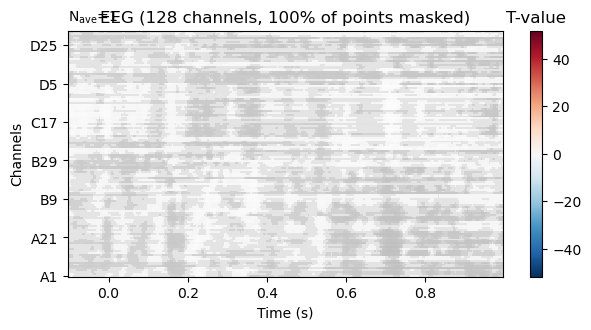

/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for col in cont.collections:
/opt/anaconda3/envs/mne_13/lib/python3.9/site-packages/mne/viz/topomap.py:976: Matplotli

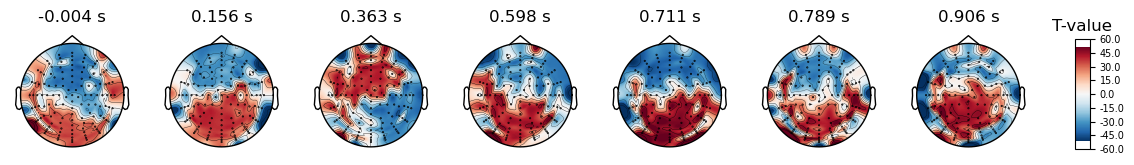

(array([[-31.36455998, -31.36455998, -25.13961018, ...,  31.66682436,
          27.25802634,  27.25802634],
        [-25.13961018, -31.36455998,  -0.        , ...,  31.66682436,
          27.25802634,  27.25802634],
        [-25.13961018, -25.13961018,  -0.        , ...,  27.25802634,
           0.        ,  27.25802634],
        ...,
        [ 27.25802634,  39.14026098,  39.14026098, ..., -25.13961018,
          -0.        ,  -0.        ],
        [ 27.25802634,  39.14026098,  27.25802634, ..., -25.13961018,
          -0.        , -25.13961018],
        [ 27.25802634,  39.14026098,  27.25802634, ..., -25.13961018,
         -25.13961018, -25.13961018]]),
 [array([[ True, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..

In [15]:

permutations=1000
tfce = dict(start=0, step=.5)
clus.get_Ttest_TFCE(X,plot_times='peaks',adjacency=adjacency,averages=None,permutations=permutations)

